# Exploring the data prior to modeling
Inspect the dataset to guide model development

In [3]:
import os
os.chdir('..')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

filepath = "data/raw/incidents_train.csv"
train_df = pd.read_csv(filepath)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5082 entries, 0 to 5081
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        5082 non-null   int64 
 1   year              5082 non-null   int64 
 2   month             5082 non-null   int64 
 3   day               5082 non-null   int64 
 4   country           5082 non-null   object
 5   title             5082 non-null   object
 6   text              5082 non-null   object
 7   hazard-category   5082 non-null   object
 8   product-category  5082 non-null   object
 9   hazard            5082 non-null   object
 10  product           5082 non-null   object
dtypes: int64(4), object(7)
memory usage: 436.9+ KB


In [5]:
print("The training data consists of {} food recall incidents".format(len(train_df)))
print("Five elements in our training sample:")
from sklearn.utils import shuffle
shuffle(train_df).head(5)

The training data consists of 5082 food recall incidents
Five elements in our training sample:


,Unnamed: 0,year,month,day,country,title,text,hazard-category,product-category,hazard,product
4811,5638,2022,2,19,uk,Freshers Foods Ltd recalls various pork snack ...,Fresher Foods Ltd is recalling several product...,biological,"meat, egg and dairy products",salmonella,pig meat - pork
3879,4321,2020,7,27,uk,Mars Food UK recalls Uncle Ben’s Brown Basmati...,Mars Food UK is recalling Uncle Ben’s Brown Ba...,foreign bodies,cereals and bakery products,glass fragment,brown rice
3601,3961,2019,12,20,ca,Casa Madaio brand Burrata cheese recalled due ...,Notification - Casa Madaio brand Burrata chees...,biological,"meat, egg and dairy products",staphylococcus,cream cheese
2871,3031,2018,9,12,us,Sarap Asian Fusion Recalls Cookies due to Unde...,"Sarap Asian Fusion of Garden Grove, CA is reca...",allergens,cereals and bakery products,milk and products thereof,cookies
3083,3290,2019,1,23,us,Stino Da Napoli Recalls Various Meat Products ...,"WASHINGTON, Jan. 23, 2019 – Stino Da Napoli, a...",fraud,prepared dishes and snacks,inspection issues,lasagne


In [6]:
print(train_df['hazard-category'].value_counts())
print("Number of hazard categories: {}".format(len(train_df['hazard-category'].unique())))

hazard-category
allergens                         1854
biological                        1741
foreign bodies                     561
fraud                              371
chemical                           287
other hazard                       134
packaging defect                    54
organoleptic aspects                53
food additives and flavourings      24
migration                            3
Name: count, dtype: int64
Number of hazard categories: 10


In [7]:
print(train_df['product-category'].value_counts())
print("Number of product categories: {}".format(len(train_df['product-category'].unique())))

product-category
meat, egg and dairy products                         1434
cereals and bakery products                           671
fruits and vegetables                                 535
prepared dishes and snacks                            469
seafood                                               268
soups, broths, sauces and condiments                  264
nuts, nut products and seeds                          262
ices and desserts                                     222
cocoa and cocoa preparations, coffee and tea          210
confectionery                                         170
non-alcoholic beverages                               134
dietetic foods, food supplements, fortified foods     131
herbs and spices                                      125
alcoholic beverages                                    59
other food product / mixed                             55
pet feed                                               20
fats and oils                                          

In [8]:
print(train_df['product'].value_counts())
print("Number of products: {}".format(len(train_df['product'].unique())))

product
ice cream                    185
chicken based products       138
cakes                         93
ready to eat - cook meals     79
cookies                       78
                            ... 
almond kernels                 1
ground hot pepper              1
bovine fat                     1
salted radish                  1
pork loins - frozen            1
Name: count, Length: 1022, dtype: int64
Number of products: 1022


In [9]:
print(train_df['hazard'].value_counts())
print("Number of hazards: {}".format(len(train_df['hazard'].unique())))

hazard
listeria monocytogenes          665
salmonella                      621
milk and products thereof       588
escherichia coli                237
peanuts and products thereof    211
                               ... 
haloxyfop                         3
amygdalin                         3
unauthorised operator             3
coconut                           3
organochlorine                    3
Name: count, Length: 128, dtype: int64
Number of hazards: 128


In [9]:
def check_overlap(df, col1, col2):
  overlap = False
  for cat1 in df[col1].unique():
    for cat2 in df[col2].unique():
      if cat1 == cat2:
        print(f"Overlap found: {cat1} in {col1} and {cat2} in {col2}")
    if overlap:
      break

check_overlap(train_df, 'hazard-category', 'product-category')
check_overlap(train_df, 'hazard', 'product')
check_overlap(train_df, 'hazard', 'hazard-category')
check_overlap(train_df, 'product', 'product-category')

Overlap found: food additives and flavourings in hazard-category and food additives and flavourings in product-category
Overlap found: crustaceans and products thereof in hazard and crustaceans and products thereof in product
Overlap found: nuts in hazard and nuts in product
Overlap found: cashew in hazard and cashew in product
Overlap found: cereals in hazard and cereals in product
Overlap found: allergens in hazard and allergens in hazard-category
Overlap found: packaging defect in hazard and packaging defect in hazard-category
Overlap found: chemical in hazard and chemical in hazard-category
Overlap found: foreign bodies in hazard and foreign bodies in hazard-category
Overlap found: seafood in product and seafood in product-category
Overlap found: other food product / mixed in product and other food product / mixed in product-category
Overlap found: confectionery in product and confectionery in product-category
Overlap found: fruits and vegetables in product and fruits and vegetable

In [11]:
def check_for_nulls(df):
  for col in df.columns:
    if df[col].isnull().sum() > 0:
      print(f"Column {col} has {df[col].isnull().sum()} null values.")
check_for_nulls(train_df)

In [12]:
def check_subcategories(df, category):
  found = False
  for c in df[category].unique():
    sub_category_df = df[df[category] == c]
    sup_category = sub_category_df[f'{category}-category'].value_counts().keys()
    if len(sup_category) > 1:
      print(f'{category}: {c} exists in {len(sup_category)} categories')
      print(f'{sup_category.value_counts()}')
      print('############################################')
      found = True
    # else:
    #   print(f'Product: {product} exists in {len(sup_category)} category')
  return found


In [13]:
product_check = check_subcategories(train_df,'product')
if product_check:
  print('Product found in more that 1 product-categories')
else:
  print('Product didn\'t find in more that 1 product-categories.')

Product didn't find in more that 1 product-categories.


In [14]:
hazard_check = check_subcategories(train_df,'hazard')
if hazard_check:
  print('Hazard found in more that 1 hazard-categories')
else:
  print('Hazard didn\'t find in more that 1 hazard-categories.')

hazard: other exists in 9 categories
hazard-category
chemical                          1
fraud                             1
biological                        1
food additives and flavourings    1
other hazard                      1
foreign bodies                    1
organoleptic aspects              1
allergens                         1
migration                         1
Name: count, dtype: int64
############################################
Hazard found in more that 1 hazard-categories


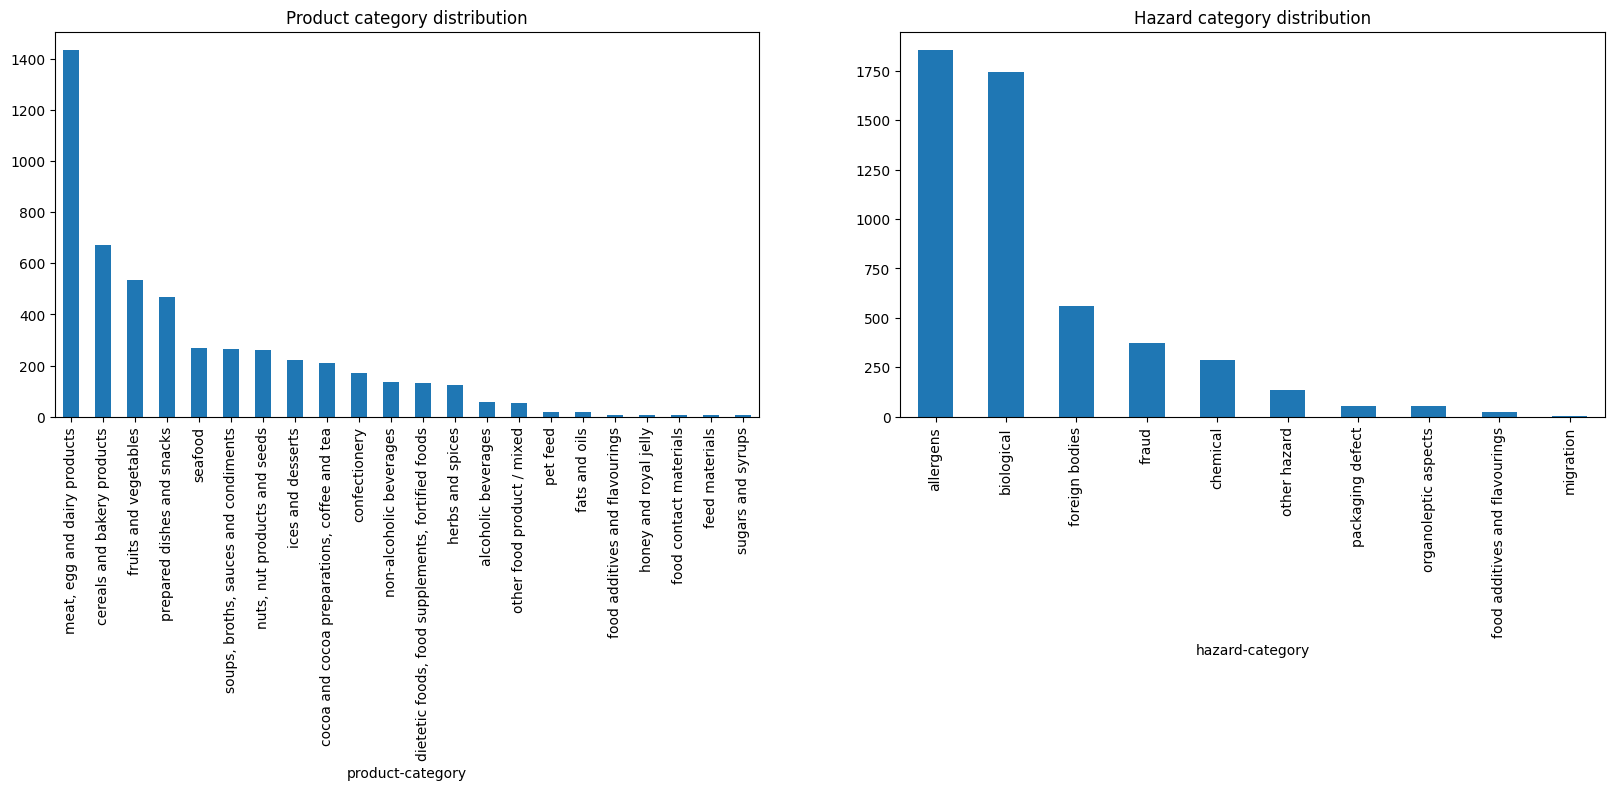

In [14]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
train_df['product-category'].value_counts().plot(kind='bar')
plt.title('Product category distribution')
plt.subplot(1, 2, 2)
train_df['hazard-category'].value_counts().plot(kind='bar')
plt.title('Hazard category distribution')
plt.savefig('data/processed/product_hazard_categories_distribution.png',bbox_inches='tight')
plt.show()

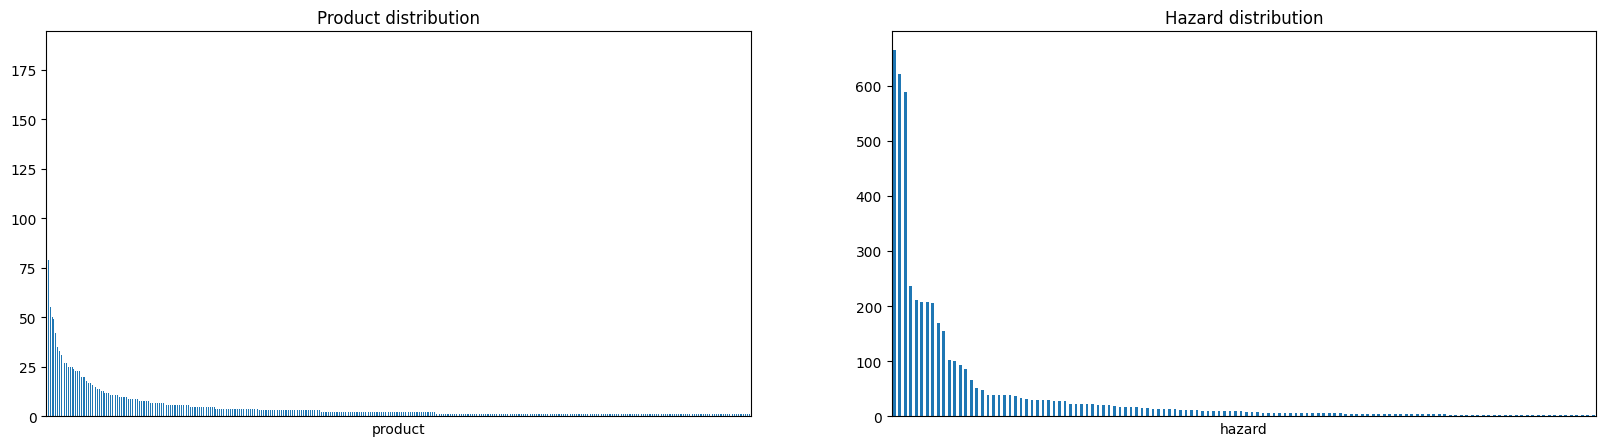

In [15]:
# print the distribution of the product but don't use x labels because they are too many
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)

ax = train_df['product'].value_counts().plot(kind='bar')
plt.title('Product distribution')
ax.set_xticks([])
plt.subplot(1, 2, 2)
ax = train_df['hazard'].value_counts().plot(kind='bar')
plt.title('Hazard distribution')
ax.set_xticks([])
plt.savefig('data/processed/product_hazard_distribution.png',bbox_inches='tight')
plt.show()


# Text statistics

## Analysing text statistics for **title** and **text**

Word frequency analysis

Sentence length analysis

Average word length analysis

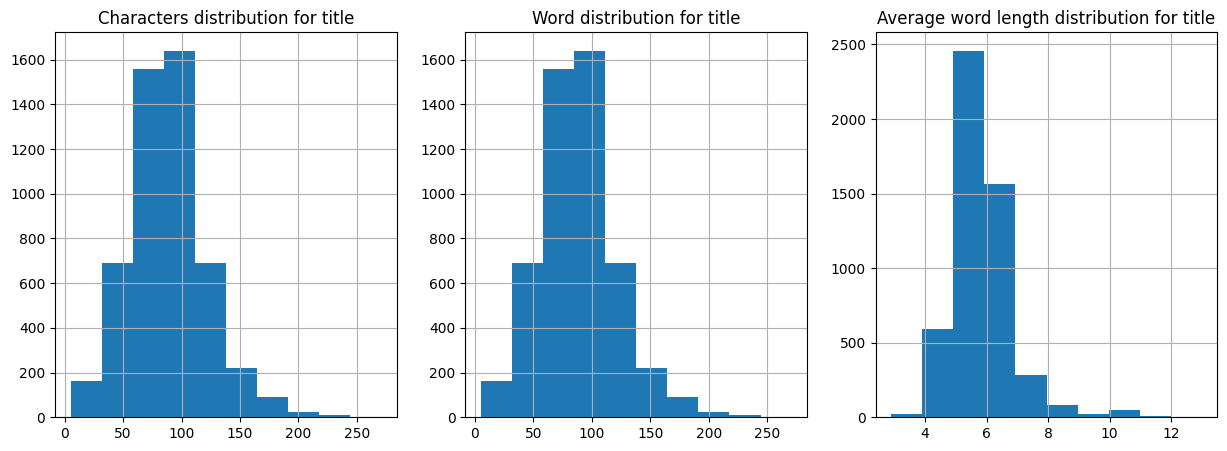

In [16]:
title = train_df['title']

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
title.str.len().hist()
plt.title('Characters distribution for title')
plt.subplot(1, 3, 2)
title.str.len().hist()
plt.title('Word distribution for title')
plt.subplot(1, 3, 3)
title.str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.title('Average word length distribution for title')
plt.show()


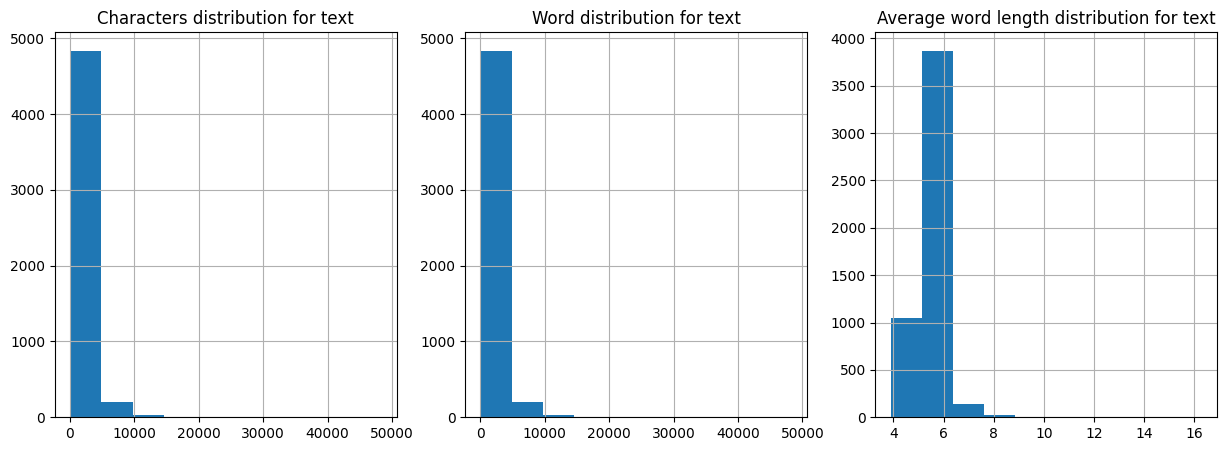

In [17]:
text = train_df['text']

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
text.str.len().hist()
plt.title('Characters distribution for text')
plt.subplot(1, 3, 2)
text.str.len().hist()
plt.title('Word distribution for text')
plt.subplot(1, 3, 3)
text.str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.title('Average word length distribution for text')
plt.show()

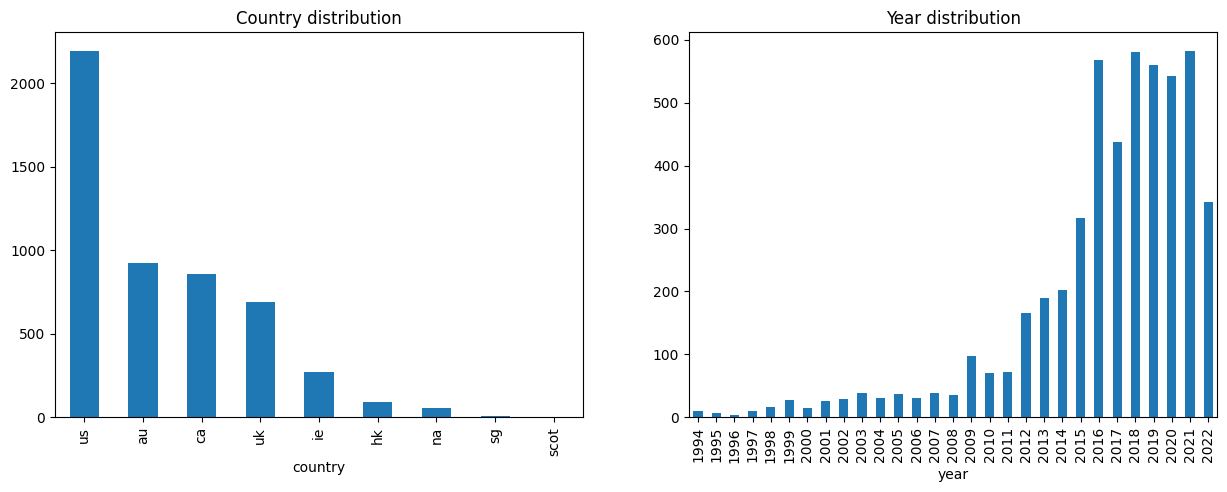

In [19]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
train_df['country'].value_counts().plot(kind='bar')
plt.title('Country distribution')
plt.subplot(1, 2, 2)
train_df['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Year distribution')
plt.savefig('data/processed/distribution.png',bbox_inches='tight')
plt.show()


Since some categories has only one value, let's find out which labels are these.
We will use these categories to augment these rows, so as to build the test dataset.

In [20]:
class_counts = train_df.groupby(['hazard-category', 'product-category', 'product', 'hazard']).size()
product_one_value = class_counts[class_counts < 2].reset_index(name='class_count')
filtered_df = train_df.merge(product_one_value, on=['hazard-category', 'product-category', 'product', 'hazard'])
print(f'Number of classes with only one value: {len(product_one_value)}')

Number of classes with only one value: 1991


## Explore the augmented dataset that we created


In [21]:
import src.data.dataio as dataio

train_df = dataio.load_df("data/processed/incidents_train_cleaned.csv")
print("shape of train data: ", train_df.shape)
print("Hazard category")
print(train_df.groupby(['hazard-category']).size().describe())
print("Product category")
print(train_df.groupby(['product-category']).size().describe())
print("Hazard")
print(train_df.groupby(['hazard']).size().describe())
print("Product")
print(train_df.groupby(['product']).size().describe())

shape of train data:  (5082, 10)
Hazard category
count      10.00000
mean      508.20000
std       702.75028
min         3.00000
25%        53.25000
50%       210.50000
75%       513.50000
max      1854.00000
dtype: float64
Product category
count      22.000000
mean      231.000000
std       325.834898
min         5.000000
25%        19.250000
50%       132.500000
75%       263.500000
max      1434.000000
dtype: float64
Hazard
count    128.000000
mean      39.703125
std      102.190293
min        3.000000
25%        4.000000
50%        8.500000
75%       24.250000
max      665.000000
dtype: float64
Product
count    1022.000000
mean        4.972603
std        10.965587
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       185.000000
dtype: float64


In [23]:
augmented_df = dataio.load_df("data/augmented/incidents_train_hazard-category_synonym_augmented.csv")
merged_df = pd.concat([train_df, augmented_df], ignore_index=True)

print("Augmented Hazard category Random Words")
print("Hazard category")
print(merged_df.groupby(['hazard-category']).size().describe())
print("shape of augmented data: ", merged_df.shape)
augmented_df = dataio.load_df("data/augmented/incidents_train_product-category_synonym_augmented.csv")
print("Product category")
merged_df = pd.concat([train_df, augmented_df], ignore_index=True)
print(merged_df.groupby(['product-category']).size().describe())
print("shape of augmented data: ", merged_df.shape)
augmented_df = dataio.load_df("data/augmented/incidents_train_hazard_synonym_augmented.csv")
print("Hazard")
merged_df = pd.concat([train_df, augmented_df], ignore_index=True)
print(merged_df.groupby(['hazard']).size().describe())
print("shape of augmented data: ", merged_df.shape)
augmented_df = dataio.load_df("data/augmented/incidents_train_product_synonym_augmented.csv")
print("Product")
merged_df = pd.concat([train_df, augmented_df], ignore_index=True)
print(merged_df.groupby(['product']).size().describe())
print("shape of augmented data: ", merged_df.shape)

Augmented Hazard category Random Words
Hazard category
count      10.000000
mean      608.200000
std       635.568127
min       203.000000
25%       253.250000
50%       310.500000
75%       513.500000
max      1854.000000
dtype: float64
shape of augmented data:  (6082, 10)
Product category
count      22.000000
mean      349.181818
std       270.789258
min       205.000000
25%       212.250000
50%       260.500000
75%       333.250000
max      1434.000000
dtype: float64
shape of augmented data:  (7682, 10)
Hazard
count    128.000000
mean     130.328125
std       81.137592
min      101.000000
25%      104.000000
50%      108.000000
75%      122.000000
max      665.000000
dtype: float64
shape of augmented data:  (16682, 10)
Product
count    1022.000000
mean       54.874755
std         9.719573
min        51.000000
25%        51.000000
50%        52.000000
75%        54.000000
max       185.000000
dtype: float64
shape of augmented data:  (56082, 10)
